In [47]:
%matplotlib inline
import sys
sys.path.append('../../scripts/')
from load_SAIdata import Cases
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import numpy as np

In [3]:
ds = {
    'cnt': Cases('mres.cnt').select('atm','h0').open_mfdataset()[['PRECT','QREFHT','QFLX','PS','TS','gw','time_bnds']],
    'sai': Cases('mres.sai').select('atm','h0').open_mfdataset()[['PRECT','QREFHT','QFLX','PS','TS','gw','time_bnds']],
}

Reading combined kerchunk reference file /home/jasperdj/kerchunk/rcp8.5_co2_f05_t12.cam2.h0.2000-01_2074-09.json
Reading combined kerchunk reference file /home/jasperdj/kerchunk/mres_b.e10.B2000_CAM5.f05_t12.001.cam2.h0.2045-01_2098-12.json


In [4]:
ds_ref = ds['cnt'].sel(time=slice('2000','2010')).mean('time')
ds_cnt = ds['cnt'].sel(time=slice('2063','2073')).mean('time')
ds_sai = ds['sai'].sel(time=slice('2063','2073')).mean('time')

Text(0.5, 0.98, 'mres precipitation and evaporation\nref: (2000-2010), cnt/sai: (2063-2073)')

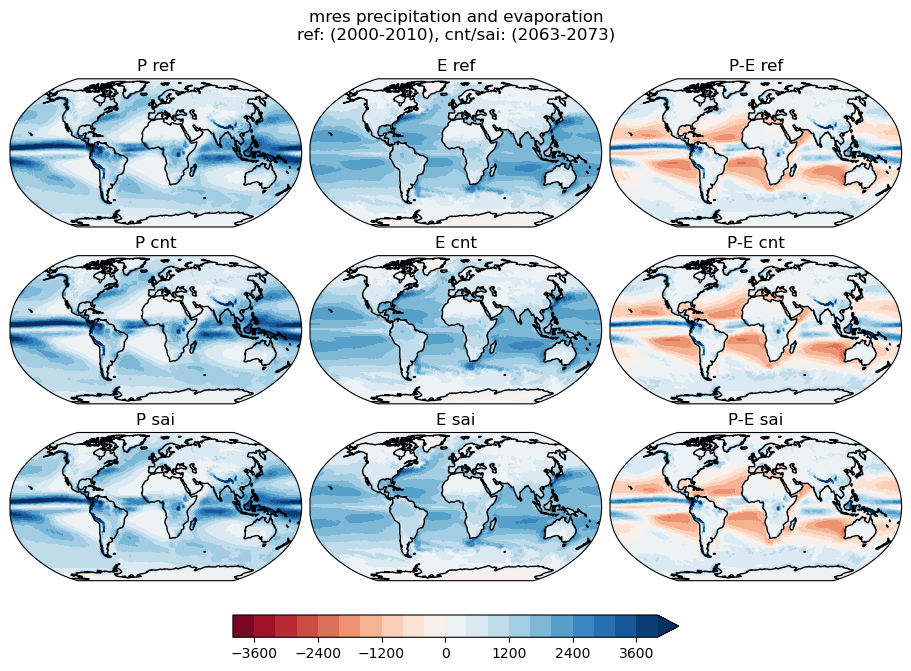

In [40]:
FACP = 86400*365*1000 # m/s to mm/year
FACQ = FACP/997 # kg/m2/s to mm/year

lons, lats = np.meshgrid(ds_ref.lon, ds_ref.lat)

fig, axs = plt.subplots(3,3, figsize=(9,7), layout='compressed', subplot_kw={'projection':ccrs.Robinson()})

for row,dsi in enumerate([ds_ref, ds_cnt, ds_sai]):
    for col,data in enumerate((dsi['PRECT']*FACP, dsi['QFLX']*FACQ, dsi['PRECT']*FACP-dsi['QFLX']*FACQ)):
        norm = mcolors.CenteredNorm(halfrange=4000)
        levels = np.linspace(norm.vmin, norm.vmax,21)
        ax = axs[row,col]
        ax.set_title(['P','E','P-E'][col]+' '+['ref','cnt','sai'][row])
        ax.coastlines()
        p = ax.contourf(lons, lats, data, levels=levels, norm=norm, extend='max', cmap='RdBu', transform=ccrs.PlateCarree(), transform_first=True)
fig.colorbar(p, ax=axs, orientation='horizontal', shrink=0.5)
fig.suptitle('mres precipitation and evaporation\nref: (2000-2010), cnt/sai: (2063-2073)')


Text(0.5, 0.98, 'mres precipitation and evaporation anomalies\nref: (2000-2010), cnt/sai: (2063-2073)')

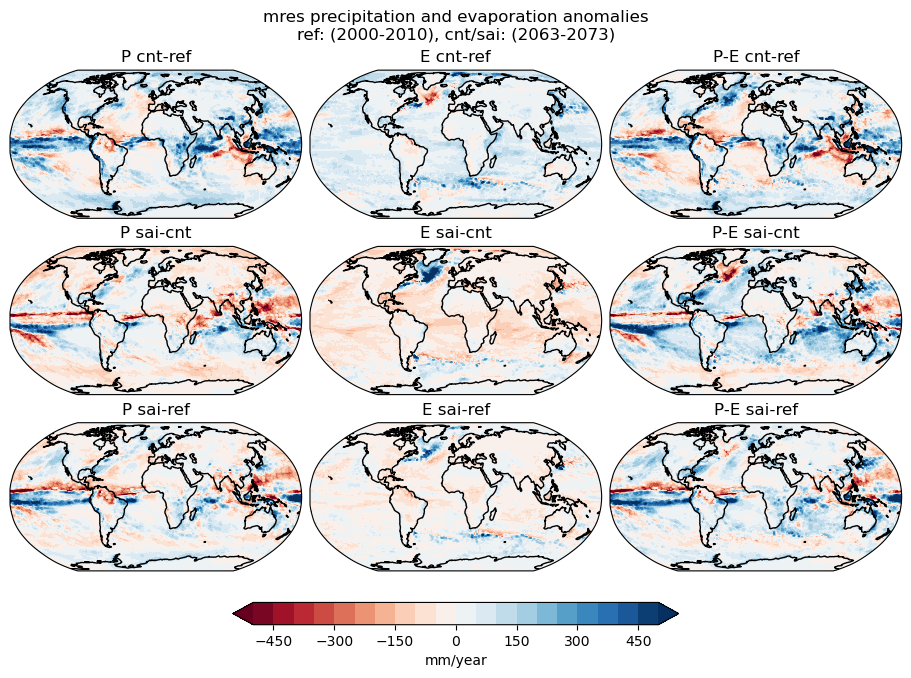

In [41]:
FACP = 86400*365*1000 # m/s to mm/year
FACQ = FACP/997 # kg/m2/s to mm/year

lons, lats = np.meshgrid(ds_ref.lon, ds_ref.lat)

fig, axs = plt.subplots(3,3, figsize=(9,7), layout='compressed', subplot_kw={'projection':ccrs.Robinson()})

for row,dsi in enumerate([ds_cnt-ds_ref, ds_sai-ds_cnt, ds_sai-ds_ref]):
    for col,data in enumerate((dsi['PRECT']*FACP, dsi['QFLX']*FACQ, dsi['PRECT']*FACP-dsi['QFLX']*FACQ)):
        norm = mcolors.CenteredNorm(halfrange=500)
        levels = np.linspace(norm.vmin, norm.vmax,21)
        ax = axs[row,col]
        ax.set_title(['P','E','P-E'][col]+' '+['cnt-ref','sai-cnt','sai-ref'][row])
        ax.coastlines()
        p = ax.contourf(lons, lats, data, levels=levels, norm=norm, extend='both', cmap='RdBu', transform=ccrs.PlateCarree(), transform_first=True)
fig.colorbar(p, ax=axs, orientation='horizontal', shrink=0.5, label='mm/year')
fig.suptitle('mres precipitation and evaporation anomalies\nref: (2000-2010), cnt/sai: (2063-2073)')

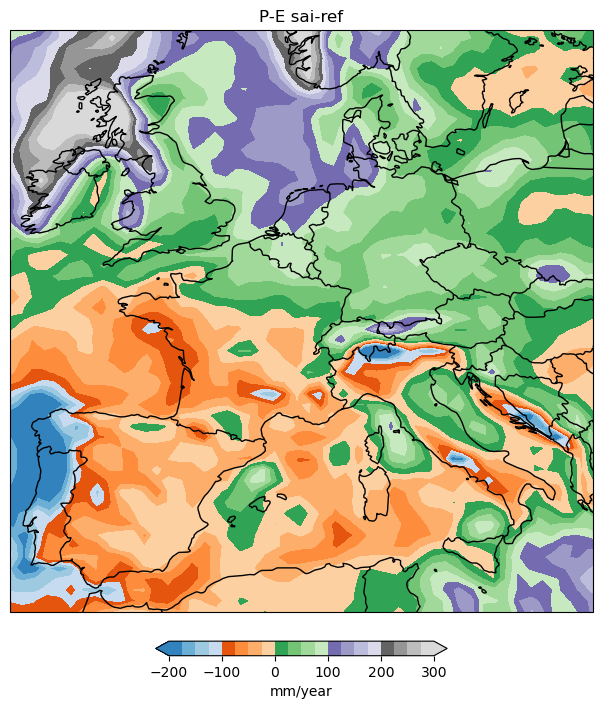

In [49]:
FACP = 86400*365*1000 # m/s to mm/year
FACQ = FACP/997 # kg/m2/s to mm/year

lons, lats = np.meshgrid(ds_ref.lon, ds_ref.lat)

fig, axs = plt.subplots(1,1, figsize=(9,7), layout='compressed', subplot_kw={'projection':ccrs.Robinson()})

dsi=ds_sai-ds_ref
data = dsi['PRECT']*FACP-dsi['QFLX']*FACQ
norm = mcolors.Normalize(vmin=-200,vmax=300)
levels = np.linspace(norm.vmin, norm.vmax,21)
ax = axs
ax.set_title('P-E sai-ref')
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.set_extent((-10,20,35,60))
p = ax.contourf(lons, lats, data, levels=levels, norm=norm, extend='both', cmap='tab20c', transform=ccrs.PlateCarree(), transform_first=True)
#ax.contour(lons,lats,data,levels=range(-1000,1000,25), colors='w', linewidths=0.5, transform=ccrs.PlateCarree(),transform_first=True)
fig.colorbar(p, ax=axs, orientation='horizontal', shrink=0.5, label='mm/year', ticks=levels[::4])